Importa bibliotecas necessárias para o modelo

In [194]:
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt
import numpy as np
import torch

In [145]:
img = cv2.imread('Img_data/20221130_104349.jpg')


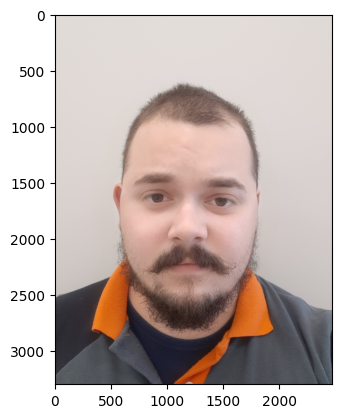

In [146]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Baixa a rede YOLOv5

In [148]:
!git clone https://github.com/ultralytics/yolov5


Cloning into 'yolov5'...


In [149]:
!pip install -r yolov5/requirements.txt

     -------------------------------------- 182.5/182.5 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 151.6/151.6 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 40.2/40.2 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 167.2/167.2 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 10.9/10.9 MB 2.9 MB/s eta 0:00:00
     -------------------------------------- 288.2/288.2 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 62.7/62.7 kB 1.6 MB/s eta 0:00:00
     -------------------------------------- 498.1/498.1 kB 2.4 MB/s eta 0:00:00


Baixa a ferramenta LabelImg

In [151]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [195]:
!pip install pyqt5 lxml --upgrade

Realiza o treinamento da rede

In [158]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\gmone\OneDrive\Ã�rea': No such file or directory
YOLOv5  2022-12-1 Python-3.9.13 torch-1.13.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, f

Carrega o modelo treinado

In [159]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp5/weights/last.pt', force_reload=True)


C:\Users\gmone\OneDrive\Área de Trabalho\GIOVANI\project\imgdetect\lib\site-packages\torch\hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\gmone/.cache\torch\hub\master.zip
YOLOv5  2022-12-1 Python-3.9.13 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


Realiza a captura em tempo real

In [196]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()